In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


1. Importing the dataset
2. Subseting a dataset
3. Visual test for normal distribution
   1. By Histogram
   2. By qqnon plot
4. Statistical analysis

In [2]:
# Importing the data set
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Subseting
df = df[['sepal_length','sepal_width','petal_length','petal_width']]
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Visualizing the normal distribution by histogram

<AxesSubplot: xlabel='petal_length', ylabel='Count'>

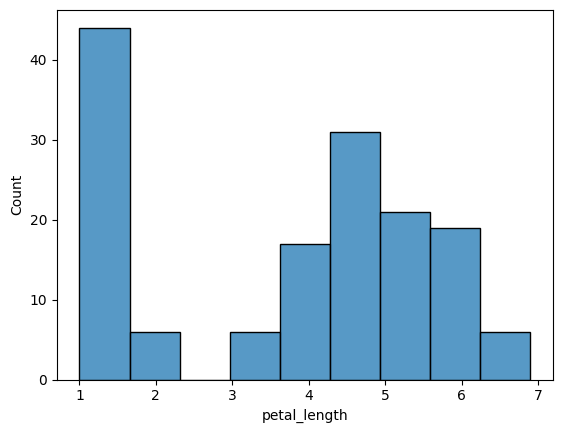

In [6]:
#Visualizing by Histogram
#For Petal_length
sns.histplot(df['petal_length'])

<AxesSubplot: xlabel='petal_width', ylabel='Count'>

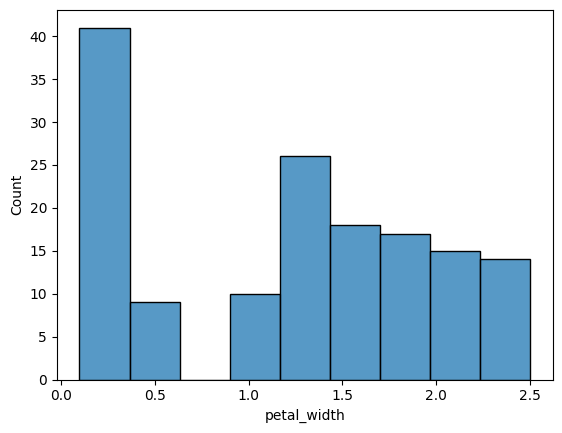

In [7]:
#For petal_width
sns.histplot(df['petal_width'])

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

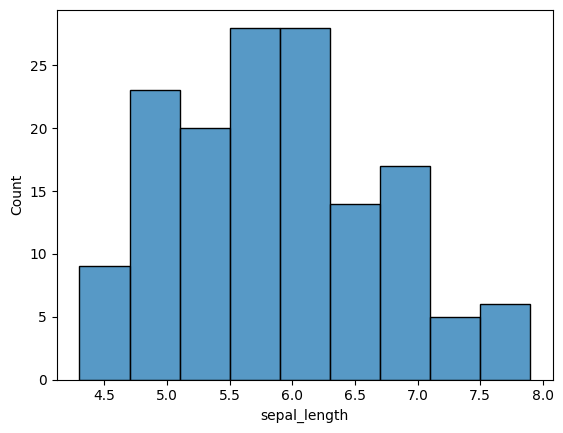

In [8]:
#For sepal_length
sns.histplot(df['sepal_length'])

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

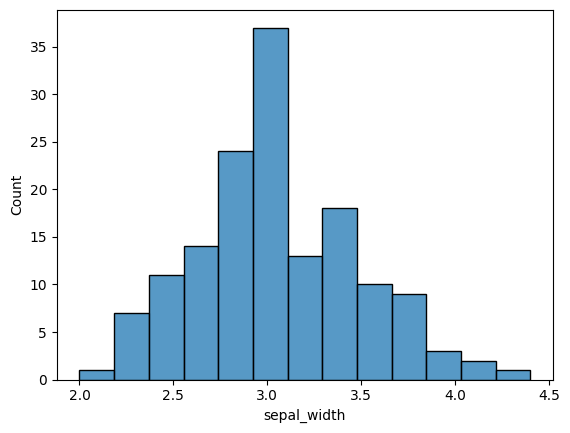

In [9]:
#For sepal_width
sns.histplot(df['sepal_width'])

#### Visualizing the normal distribution by qqnon plot

In [11]:
from statsmodels.graphics.gofplots import qqplot

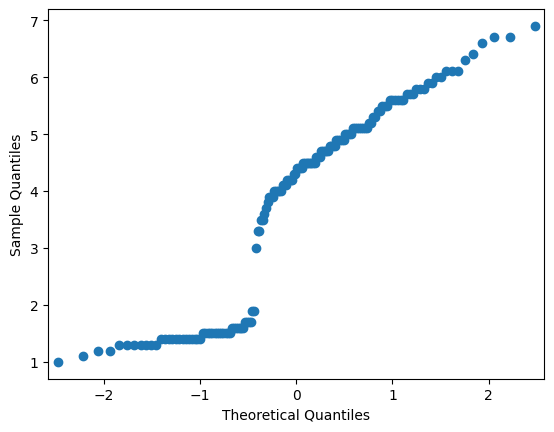

In [19]:
qqplot(df['petal_length'])
plt.show()

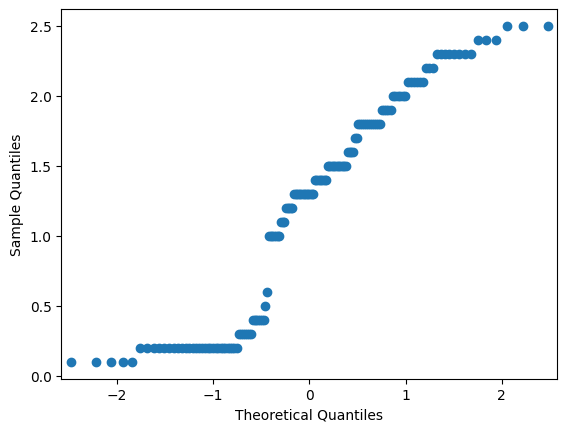

In [18]:
qqplot(df['petal_width'])
plt.show()

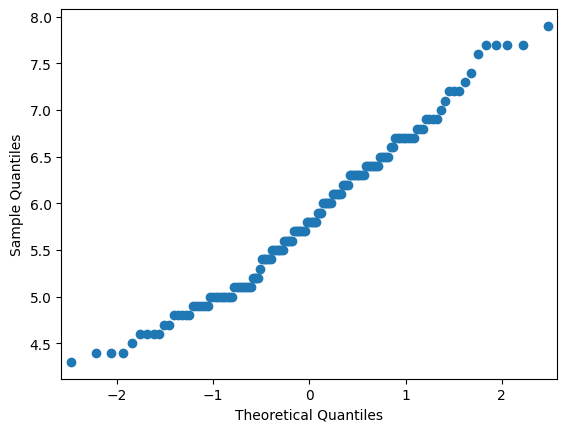

In [17]:
qqplot(df['sepal_length'])
plt.show()

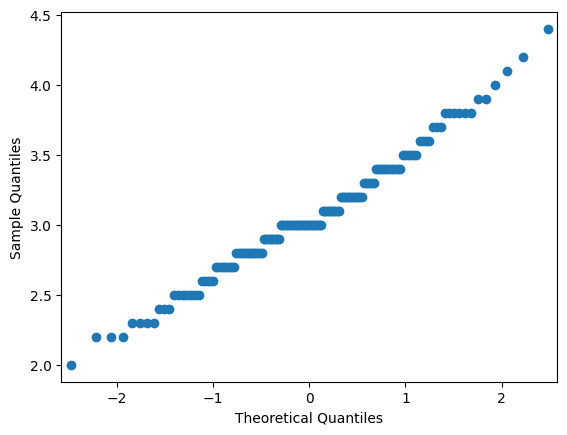

In [16]:
qqplot(df['sepal_width'])
plt.show()

#### Checking the normality by three tests
1. Shapiro-wilk test
2. D'Agostino k^2 Test
3. Anderson Darling test

###### IF?
###### P <= alpha: Data is not normal
###### P > alpha: Data is normal



#### By Shapiro-wilk test


In [26]:
# using the scipy library
from scipy.stats import shapiro
stat, p = shapiro(df['sepal_width'])
print('stat=%.3f , p=%.3f' % (stat, p))

# COndition to check the normality
if p > 0.05:
    print("Normal Distributionn")
else:
    print("Not normal")

stat=0.985 , p=0.101
Normal Distributionn


#### By D'Agostino K^2

In [34]:
from scipy.stats import normaltest
stat, p = normaltest(df['sepal_width'])
print('stat=%.3f , p=%.3f' % (stat, p))

# Condition to check the normality
if p > 0.05:
    print("Normal Distributionn")
else:
    print("Not normal")

stat=3.124 , p=0.210
Normal Distributionn


#### By Anderson Darling test


In [38]:
from scipy.stats import anderson

# perform Anderson-Darling test
result = anderson(df['sepal_width'])

# print test statistic and critical values
print('Anderson-Darling test statistic:', result.statistic)
print('Critical values:', result.critical_values)

# interpret test result
significance_level = 0.05
if result.statistic > result.critical_values[2]:
    print('Reject null hypothesis: distribution is not normal')
else:
    print('Cannot reject null hypothesis: distribution is normal')

Anderson-Darling test statistic: 0.9079550471145126
Critical values: [0.562 0.64  0.767 0.895 1.065]
Reject null hypothesis: distribution is not normal
